In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping

def preprocess_data(data):
    # Unpack data
    X_train_valid = data['X_train_valid']
    y_train_valid = data['y_train_valid']
    X_test = data['X_test']
    y_test = data['y_test']

    # One-hot Encoding for y data
    encoder = LabelBinarizer()
    y_train_valid = encoder.fit_transform(y_train_valid)
    y_test = encoder.fit_transform(y_test)

    # Splitting training and validation data
    X_train, X_val, y_train, y_val = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

    total_y_train = y_train
    total_y_val = y_val
    total_y_test = y_test

    # Trim
    X_train = X_train[:,:,0:800]
    X_val = X_val[:,:,0:800]
    X_test = X_test[:,:,0:800]

    # Maxpooling
    total_X_train = np.max(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    total_X_val = np.max(X_val.reshape(X_val.shape[0], X_val.shape[1], -1, 4), axis=3)
    total_X_test = np.max(X_test.reshape(X_test.shape[0], X_test.shape[1], -1, 4), axis=3)

    # Validation and Test Data augmentation stops here (reshaping purposes)
    # Averaging and Subsampling below only apply to Training Data

    # Average every 4 time dumps
    X_train_average = np.mean(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    X_train_average += np.random.normal(0.0, 0.5, X_train_average.shape)
    total_X_train = np.vstack((total_X_train, X_train_average))
    total_y_train = np.vstack((total_y_train, y_train))

    # Subsample every 4 time-dumps
    for i in range(0, 4):
        X_train_subsample = X_train[:, :, i::4] + np.random.normal(0.0, 0.5, X_train[:, :,i::4].shape)
        total_X_train = np.vstack((total_X_train, X_train_subsample))
        total_y_train = np.vstack((total_y_train, y_train))

    return {'total_X_train': total_X_train, 'total_X_test': total_X_test,
            'total_X_val': total_X_val, 'total_y_val': total_y_val,
            'total_y_train': total_y_train, 'total_y_test': total_y_test}

/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                    │ (None, 25, 16)         │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │         1,604 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,524 (13.77 KB)

 Trainable params: 3,524 (13.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.2718 - loss: 2.7878 - val_accuracy: 0.2553 - val_loss: 2.2936
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2917 - loss: 2.5179 - val_accuracy: 0.3050 - val_loss: 2.1252
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3138 - loss: 2.3119 - val_accuracy: 0.3570 - val_loss: 2.0256
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.3274 - loss: 2.1552 - val_accuracy: 0.3995 - val_loss: 1.9366
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3591 - loss: 2.0115 - val_accuracy: 0.4066 - val_loss: 1.8533
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3792 - loss: 1.9003 - val_accuracy: 0.4043 - val_loss: 1.7973
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.4019 - loss: 1.7870 - val_accuracy: 0.4232 - val_loss: 1.7285
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4186 - loss: 1.7222 - val_accuracy: 0.4492 - val_loss: 1

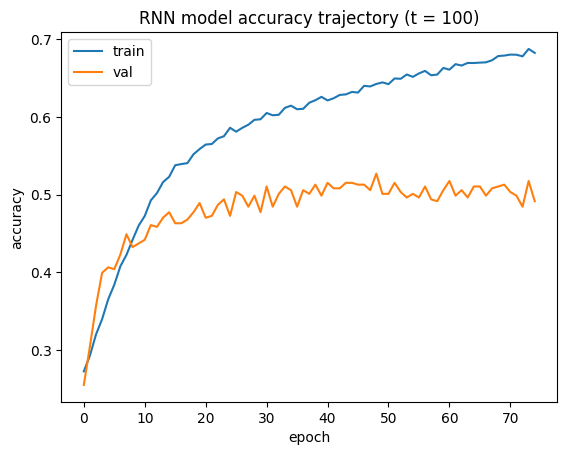

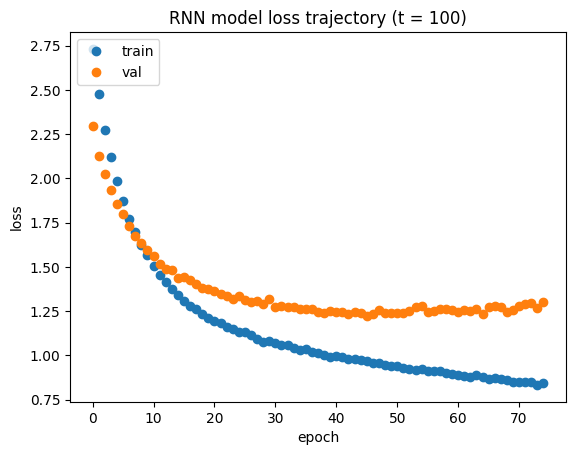

Test accuracy of the RNN model: 0.5214446783065796


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_11 (GRU)                    │ (None, 50, 16)         │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         3,204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,124 (20.02 KB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.2456 - loss: 2.9379 - val_accuracy: 0.3168 - val_loss: 2.2803
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.3194 - loss: 2.4790 - val_accuracy: 0.3806 - val_loss: 2.1010
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.3530 - loss: 2.2759 - val_accuracy: 0.4255 - val_loss: 1.9465
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.4018 - loss: 2.0648 - val_accuracy: 0.4374 - val_loss: 1.8417
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4343 - loss: 1.9087 - val_accuracy: 0.4870 - val_loss: 1.7556
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.4595 - loss: 1.7948 - val_accuracy: 0.4941 - val_loss: 1.6950
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.4944 - loss: 1.6736 - val_accuracy: 0.5130 - val_loss: 1.6228
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.5204 - loss: 1.5737 - val_accuracy: 0.5012 - val_lo

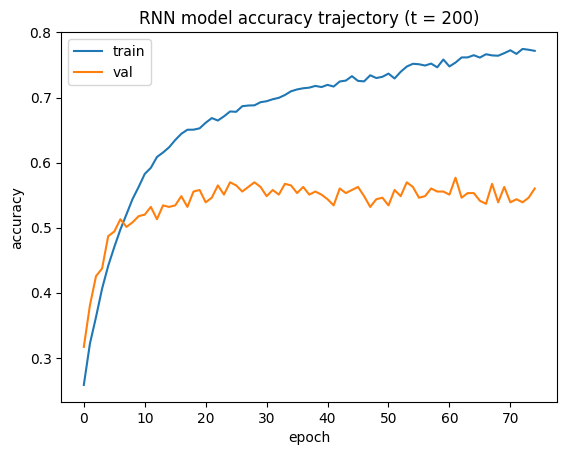

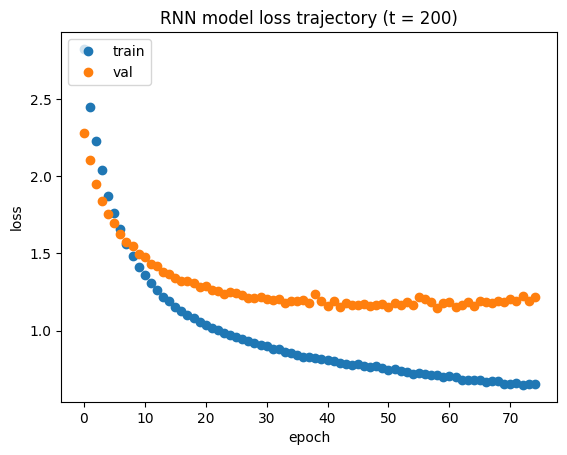

Test accuracy of the RNN model: 0.6094807982444763


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                    │ (None, 75, 16)         │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │         4,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,724 (26.27 KB)

 Trainable params: 6,724 (26.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - accuracy: 0.2753 - loss: 2.8539 - val_accuracy: 0.3381 - val_loss: 2.2687
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.3633 - loss: 2.4238 - val_accuracy: 0.3877 - val_loss: 2.0920
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.4073 - loss: 2.1519 - val_accuracy: 0.4279 - val_loss: 1.9527
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.4552 - loss: 1.9658 - val_accuracy: 0.4539 - val_loss: 1.8609
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.4986 - loss: 1.7887 - val_accuracy: 0.4563 - val_loss: 1.7744
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.5271 - loss: 1.6584 - val_accuracy: 0.5035 - val_loss: 1.7032
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.5537 - loss: 1.5626 - val_accuracy: 0.4965 - val_loss: 1.6485
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.5784 - loss: 1.4665 - val_accuracy: 0.5130 - val_

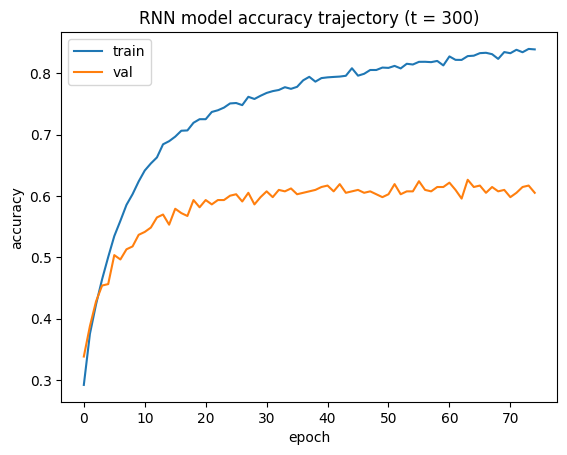

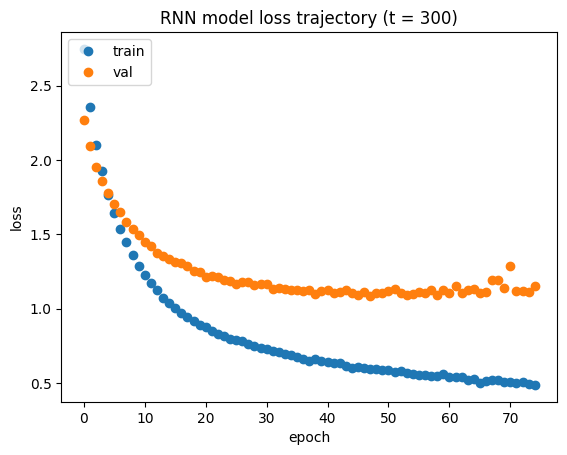

Test accuracy of the RNN model: 0.6230248212814331


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_13 (GRU)                    │ (None, 100, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │         6,404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,324 (32.52 KB)

 Trainable params: 8,324 (32.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.2593 - loss: 2.8922 - val_accuracy: 0.3593 - val_loss: 2.2725
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.3698 - loss: 2.3760 - val_accuracy: 0.4137 - val_loss: 2.0989
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.4321 - loss: 2.0931 - val_accuracy: 0.4161 - val_loss: 1.9603
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.4862 - loss: 1.8786 - val_accuracy: 0.4326 - val_loss: 1.8452
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.5309 - loss: 1.7077 - val_accuracy: 0.4515 - val_loss: 1.7608
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.5754 - loss: 1.5677 - val_accuracy: 0.4846 - val_loss: 1.6753
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.6017 - loss: 1.4618 - val_accuracy: 0.4752 - val_loss: 1.6294
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.6281 - loss: 1.3691 - val_accuracy: 0.4941 - val

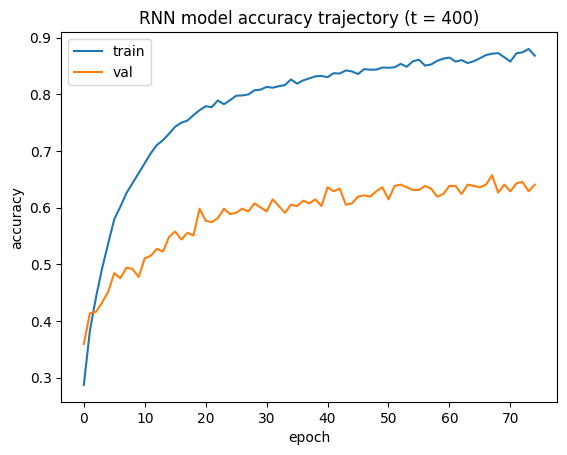

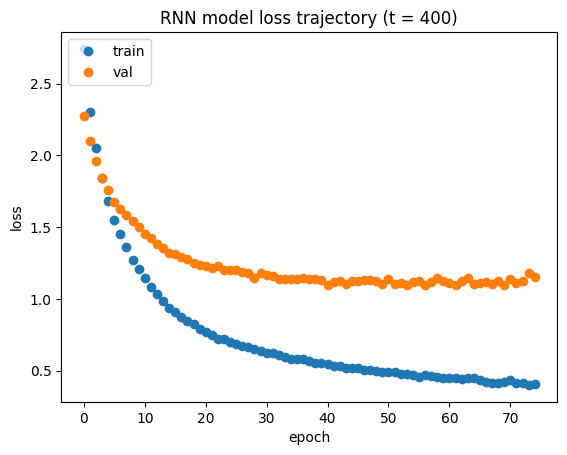

Test accuracy of the RNN model: 0.6297968626022339


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_14 (GRU)                    │ (None, 125, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │         8,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,924 (38.77 KB)

 Trainable params: 9,924 (38.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.2568 - loss: 2.8994 - val_accuracy: 0.3191 - val_loss: 2.3174
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.3738 - loss: 2.3766 - val_accuracy: 0.3712 - val_loss: 2.1586
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - accuracy: 0.4289 - loss: 2.0982 - val_accuracy: 0.4090 - val_loss: 1.9949
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - accuracy: 0.4741 - loss: 1.8902 - val_accuracy: 0.4397 - val_loss: 1.8766
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.5387 - loss: 1.6905 - val_accuracy: 0.4539 - val_loss: 1.7883
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.5786 - loss: 1.5589 - val_accuracy: 0.4870 - val_loss: 1.7106
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.6190 - loss: 1.4345 - val_accuracy: 0.5083 - val_loss: 1.6403
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.6320 - loss: 1.3538 - val_accuracy: 0.5248 - val_

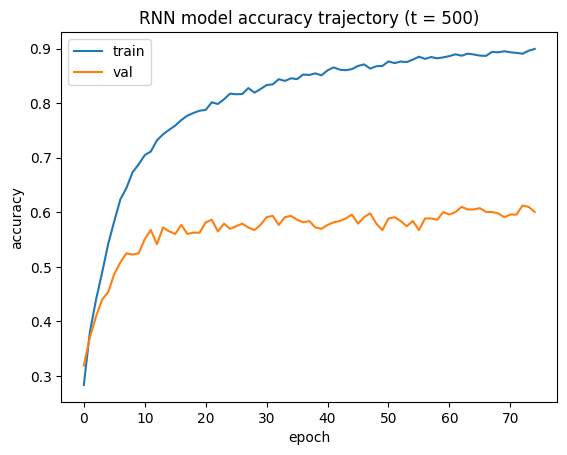

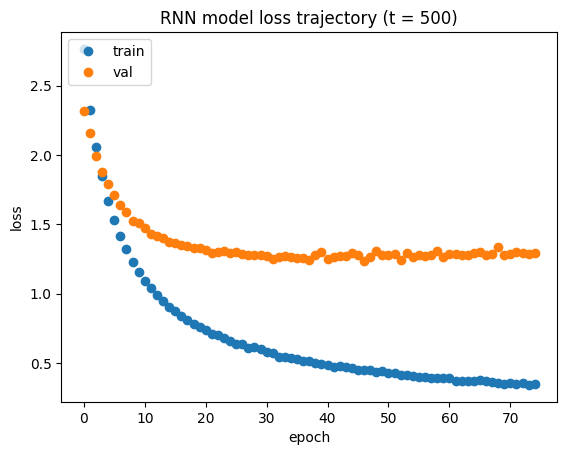

Test accuracy of the RNN model: 0.6523702144622803


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_15 (GRU)                    │ (None, 150, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 2400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 2400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │         9,604 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,524 (45.02 KB)

 Trainable params: 11,524 (45.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 410ms/step - accuracy: 0.2802 - loss: 2.8061 - val_accuracy: 0.3191 - val_loss: 2.2396
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - accuracy: 0.3704 - loss: 2.3204 - val_accuracy: 0.3546 - val_loss: 2.0960
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 267ms/step - accuracy: 0.4477 - loss: 2.0135 - val_accuracy: 0.3806 - val_loss: 1.9592
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.5078 - loss: 1.8080 - val_accuracy: 0.4279 - val_loss: 1.8448
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.5515 - loss: 1.6292 - val_accuracy: 0.4539 - val_loss: 1.7513
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step - accuracy: 0.5955 - loss: 1.4818 - val_accuracy: 0.4775 - val_loss: 1.6954
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.6183 - loss: 1.3903 - val_accuracy: 0.4657 - val_loss: 1.6447
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - accuracy: 0.6540 - loss: 1.2636 - val_accuracy: 0.4917 - val

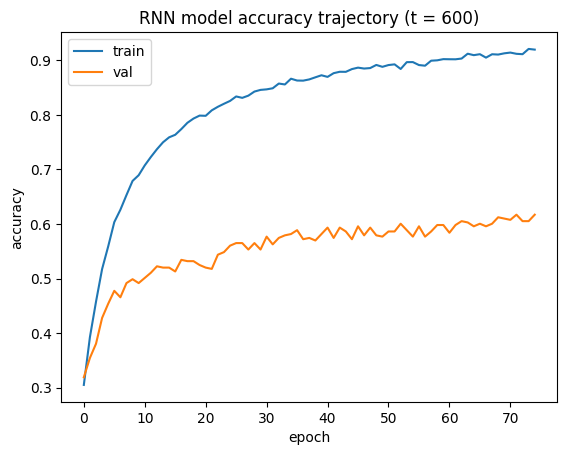

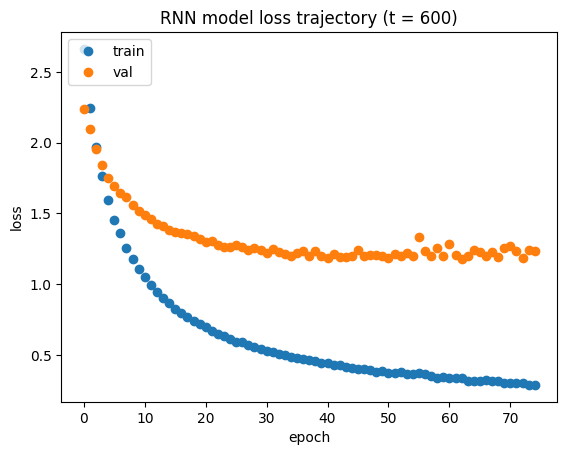

Test accuracy of the RNN model: 0.6501128673553467


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_16 (GRU)                    │ (None, 175, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 2800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 2800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │        11,204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,124 (51.27 KB)

 Trainable params: 13,124 (51.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 345ms/step - accuracy: 0.2703 - loss: 2.9317 - val_accuracy: 0.3735 - val_loss: 2.3160
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.4120 - loss: 2.2935 - val_accuracy: 0.3901 - val_loss: 2.1402
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - accuracy: 0.5137 - loss: 1.9422 - val_accuracy: 0.4350 - val_loss: 2.0272
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.5663 - loss: 1.7214 - val_accuracy: 0.4775 - val_loss: 1.9165
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.6211 - loss: 1.5603 - val_accuracy: 0.4965 - val_loss: 1.8330
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.6605 - loss: 1.4116 - val_accuracy: 0.4941 - val_loss: 1.7658
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.6820 - loss: 1.3068 - val_accuracy: 0.5035 - val_loss: 1.7224
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - accuracy: 0.7158 - loss: 1.2072 - val_accuracy: 0.5106 - val

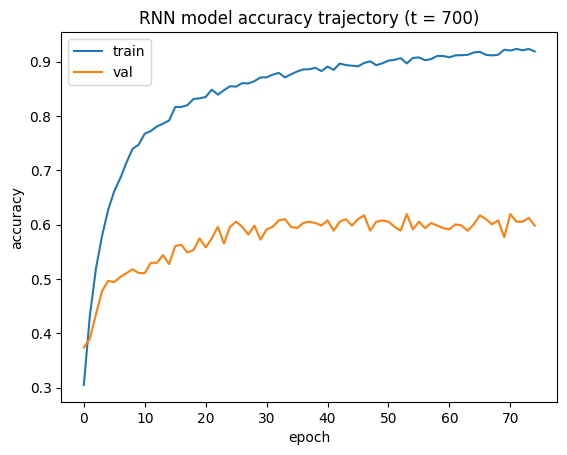

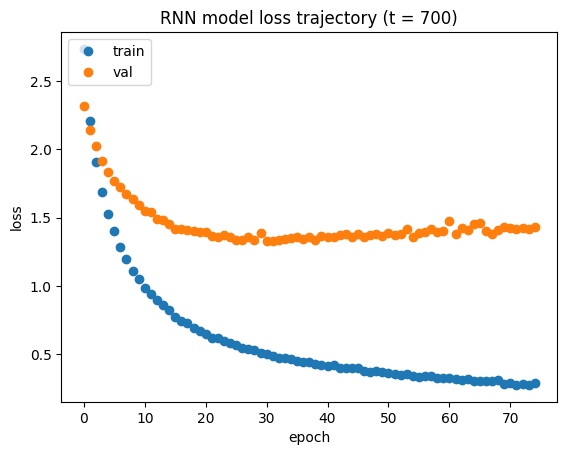

Test accuracy of the RNN model: 0.6455981731414795


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_17 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 395ms/step - accuracy: 0.2811 - loss: 2.8083 - val_accuracy: 0.3853 - val_loss: 2.2061
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.4377 - loss: 2.2442 - val_accuracy: 0.3877 - val_loss: 2.0482
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.5167 - loss: 1.8924 - val_accuracy: 0.4303 - val_loss: 1.9444
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - accuracy: 0.5843 - loss: 1.6611 - val_accuracy: 0.4634 - val_loss: 1.8624
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.6277 - loss: 1.5034 - val_accuracy: 0.4681 - val_loss: 1.7819
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.6757 - loss: 1.3491 - val_accuracy: 0.4728 - val_loss: 1.7284
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 387ms/step - accuracy: 0.7025 - loss: 1.2388 - val_accuracy: 0.4965 - val_loss: 1.6869
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step - accuracy: 0.7282 - loss: 1.1466 - val_accuracy: 0.4988 - v

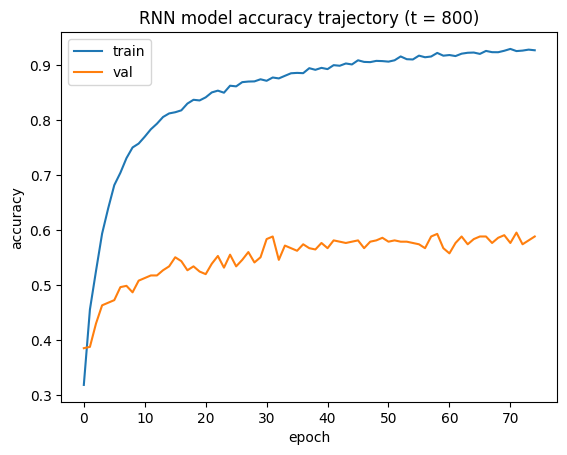

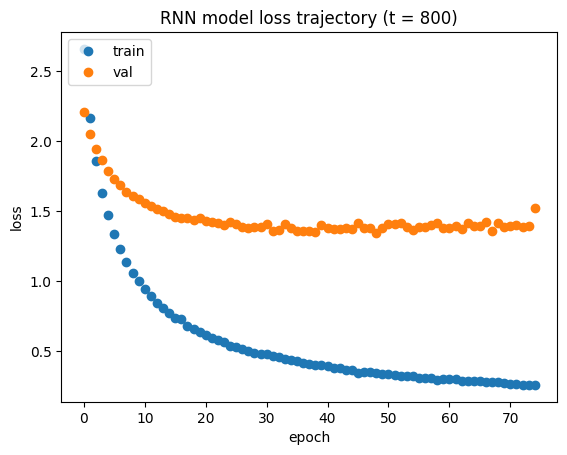

Test accuracy of the RNN model: 0.5914221405982971


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_18 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 426ms/step - accuracy: 0.2837 - loss: 2.9022 - val_accuracy: 0.3452 - val_loss: 2.2373
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.4107 - loss: 2.2911 - val_accuracy: 0.4303 - val_loss: 2.0993
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 377ms/step - accuracy: 0.4965 - loss: 1.9603 - val_accuracy: 0.4563 - val_loss: 1.9845
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.5694 - loss: 1.7229 - val_accuracy: 0.4681 - val_loss: 1.8974
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - accuracy: 0.6146 - loss: 1.5683 - val_accuracy: 0.4704 - val_loss: 1.8339
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - accuracy: 0.6525 - loss: 1.4333 - val_accuracy: 0.4634 - val_loss: 1.7950
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.6823 - loss: 1.3059 - val_accuracy: 0.4894 - val_loss: 1.7408
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 398ms/step - accuracy: 0.7100 - loss: 1.2179 - val_accuracy: 0.4988 - va

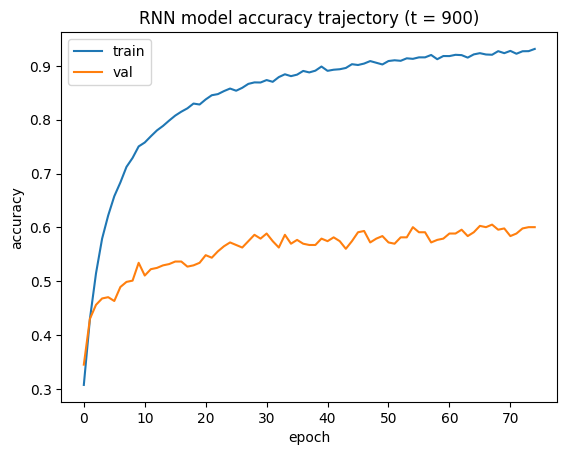

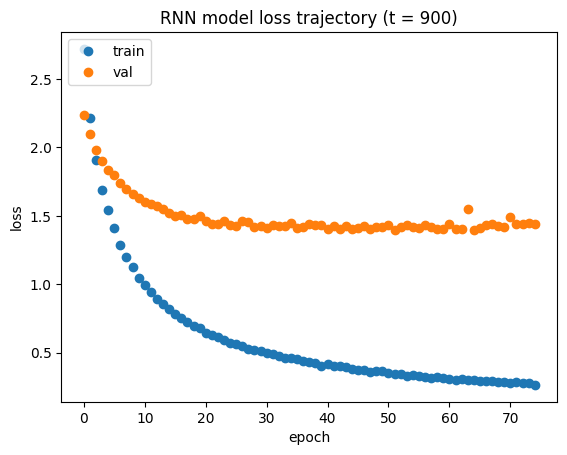

Test accuracy of the RNN model: 0.6117381453514099


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_19 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.2800 - loss: 2.8473 - val_accuracy: 0.3664 - val_loss: 2.2250
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - accuracy: 0.4185 - loss: 2.2513 - val_accuracy: 0.4232 - val_loss: 2.0727
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.5126 - loss: 1.9113 - val_accuracy: 0.4634 - val_loss: 1.9693
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 351ms/step - accuracy: 0.5838 - loss: 1.6851 - val_accuracy: 0.4681 - val_loss: 1.8801
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - accuracy: 0.6251 - loss: 1.5250 - val_accuracy: 0.4775 - val_loss: 1.8081
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.6582 - loss: 1.4031 - val_accuracy: 0.4775 - val_loss: 1.7560
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 415ms/step - accuracy: 0.7050 - loss: 1.2536 - val_accuracy: 0.4846 - val_loss: 1.7068
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.7231 - loss: 1.1707 - val_accuracy: 0.4823 - val

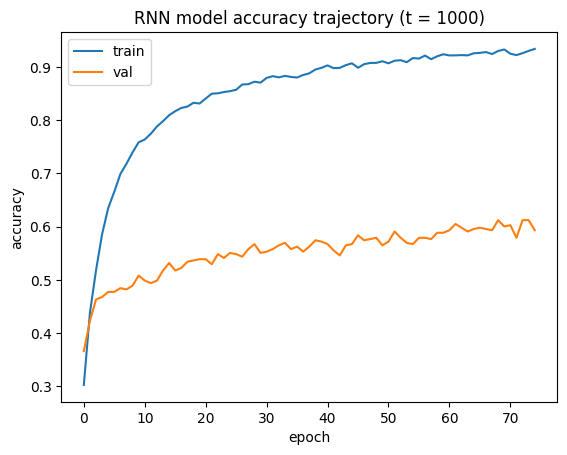

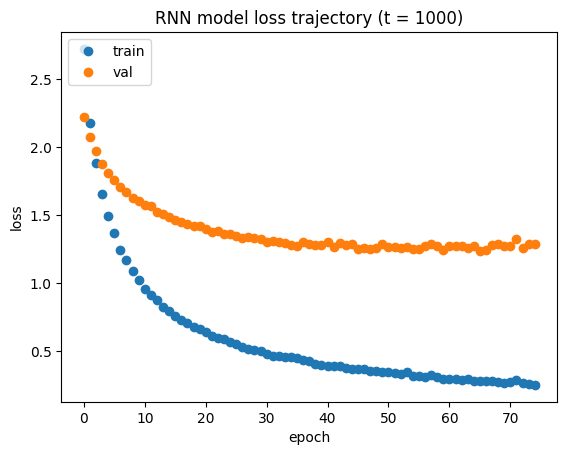

Test accuracy of the RNN model: 0.6343114972114563


In [4]:
for i in np.arange(1, 11):
    # Load original data
    X_test = np.load("data/X_test.npy")
    y_test = np.load("data/y_test.npy")
    person_train_valid = np.load("data/person_train_valid.npy")
    X_train_valid = np.load("data/X_train_valid.npy")
    y_train_valid = np.load("data/y_train_valid.npy")
    person_test = np.load("data/person_test.npy")

    X_test_slice = X_test[:,:,0:i*100]
    X_train_valid_slice = X_train_valid[:,:,0:i*100]

    data = dict()
    data['X_train_valid'] = X_train_valid_slice
    data['y_train_valid'] = y_train_valid
    data['X_test'] = X_test_slice
    data['y_test'] = y_test
    data['person_train_valid'] = person_train_valid
    data['person_test'] = person_test
    preprocessed_data = preprocess_data(data)

    # Load preprocessed data
    X_train = preprocessed_data['total_X_train']
    y_train = preprocessed_data['total_y_train']
    X_val = preprocessed_data['total_X_val']
    y_val = preprocessed_data['total_y_val']
    X_test = preprocessed_data['total_X_test']
    y_test = preprocessed_data['total_y_test']
    X_train = np.transpose(X_train, (0, 2, 1))
    X_val = np.transpose(X_val, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))


    # Model Architecture
    RNN = Sequential()

    RNN.add(GRU(16, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(0.03)))
    RNN.add(Flatten())
    RNN.add(Dropout(0.5))
    RNN.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

    RNN.compile(optimizer=optimizer, loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    RNN.summary()


    RNN_results = RNN.fit(X_train, y_train, epochs=75, batch_size=640, validation_data=(X_val, y_val), shuffle=True, verbose=1, callbacks=[])

    # Plotting accuracy trajectory
    plt.plot(RNN_results.history['accuracy'])
    plt.plot(RNN_results.history['val_accuracy'])
    plt.title('RNN model accuracy trajectory (t = {})'.format(i*100))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot(RNN_results.history['loss'],'o')
    plt.plot(RNN_results.history['val_loss'],'o')
    plt.title('RNN model loss trajectory (t = {})'.format(i*100))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    ## Testing the model
    RNN_score = RNN.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy of the RNN model:',RNN_score[1])

